In [3]:
# Ejrcicios de Markov
#2.
import numpy as np

P = np.array([
    [0.1, 0.9, 0.0],
    [0.0, 0.05, 0.95],
    [0.0, 0.0, 1.0]
])
A = np.vstack([P.T - np.eye(3), np.ones(3)])
b = np.array([0, 0, 0, 1])
pi = np.linalg.lstsq(A, b, rcond=None)[0]

p_ambas_ocupadas = pi[0] * pi[1]
p_al_menos_una = 1 - pi[2]
p_produccion_vacia = 1 - pi[0]
print("Estado estable (π):", pi)
print("Probabilidad de ambas estaciones ocupadas:", p_ambas_ocupadas)
print("Probabilidad de al menos una estación ocupada:", p_al_menos_una)
print("Probabilidad de que la estación de producción esté vacía:", p_produccion_vacia)

Estado estable (π): [ 1.59731365e-16 -1.11022302e-16  1.00000000e+00]
Probabilidad de ambas estaciones ocupadas: -1.7733743924663986e-32
Probabilidad de al menos una estación ocupada: 0.0
Probabilidad de que la estación de producción esté vacía: 0.9999999999999999


In [4]:
#3.
pi = [0.0213, 0.0202, 0.9585]
P_S1_inter_S2 = 0.00043
P_S1_union_S2 = 0.0415
P_not_S1 = 0.9787

prob_both_occupied = P_S1_inter_S2

prob_at_least_one_occupied = P_S1_union_S2

prob_production_empty = P_not_S1

print("Estado estable (π):", pi)
print("Probabilidad de que ambas estaciones estén ocupadas:", prob_both_occupied)
print("Probabilidad de que al menos una estación esté ocupada:", prob_at_least_one_occupied)
print("Probabilidad de que la estación de producción esté vacía:", prob_production_empty)

Estado estable (π): [0.0213, 0.0202, 0.9585]
Probabilidad de que ambas estaciones estén ocupadas: 0.00043
Probabilidad de que al menos una estación esté ocupada: 0.0415
Probabilidad de que la estación de producción esté vacía: 0.9787


Secuencia oculta más probable: [0, 0, 0, 0, 0, 0, 0, 0]
Probabilidad de la secuencia más probable: 0.0030958682112000022
Secuencias más probables que suman el 20% acumulado:
     Sequence    Probability  Cumulative Probability
0    00000000  3.584770e-181           3.584770e-181
128  10000000  8.961926e-182           5.413126e-181
2    00000010  2.240482e-182           3.908396e-181
8    00001000  2.240482e-182           4.293565e-181
1    00000001  9.957696e-183           3.684347e-181
..        ...            ...                     ...
245  11110101  2.371422e-188           5.775776e-181
213  11010101  1.333925e-188           5.759899e-181
181  10110101  1.333925e-188           5.636441e-181
117  01110101  5.928555e-189           4.516502e-181
85   01010101  3.334812e-189           4.512533e-181

[256 rows x 3 columns]


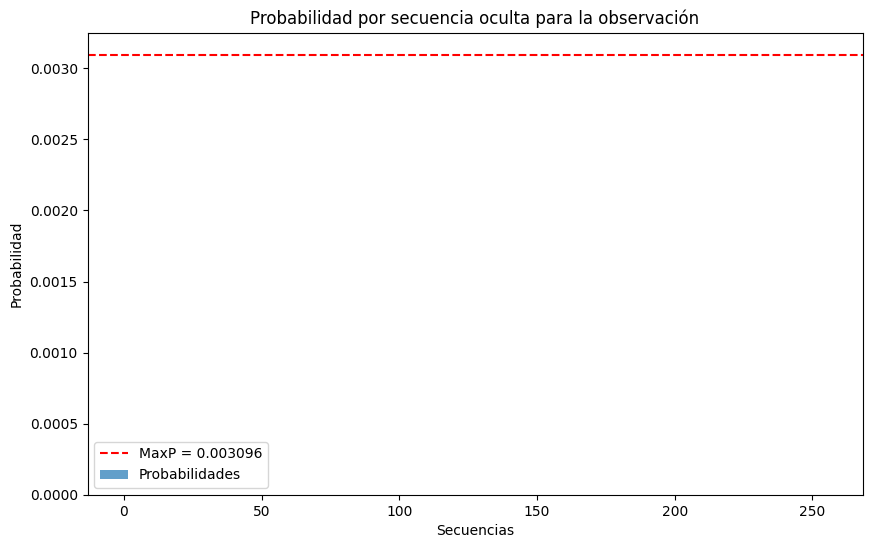

Probabilidad total de la observación (Po): 5.777500020025387e-181
¿El espacio muestral está bien definido? False


In [5]:
# Casino Tramposo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pi = np.array([0.2, 0.8])
T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.9], [0.5, 0.1]])
observations = ["S", "C", "C", "C", "S", "C", "S", "C"]
obs_map = {"S": 0, "C": 1}
obs_indices = np.array([obs_map[o] for o in observations])

n_states = len(pi)
n_obs = len(obs_indices)

dp = np.zeros((n_states, n_obs))
dp[:, 0] = pi * E[:, obs_indices[0]]
path = np.zeros((n_states, n_obs), dtype=int)

for t in range(1, n_obs):
    trans_probs = dp[:, t - 1].reshape(-1, 1) * T
    max_probs = np.max(trans_probs, axis=0)
    dp[:, t] = max_probs * E[:, obs_indices[t]]
    path[:, t] = np.argmax(trans_probs, axis=0)

last_state = np.argmax(dp[:, -1])
best_path = [last_state]
for t in range(n_obs - 1, 0, -1):
    last_state = path[last_state, t]
    best_path.insert(0, last_state)

max_prob = np.max(dp[:, -1])

print("Secuencia oculta más probable:", best_path)
print("Probabilidad de la secuencia más probable:", max_prob)

from itertools import product

states = [0, 1]
all_hidden_sequences = np.array(list(product(states, repeat=n_obs)))


hidden_probs = np.prod(
    pi[all_hidden_sequences[:, 0]] * E[all_hidden_sequences[:, 0], obs_indices[0]],
    axis=0,
)
for t in range(1, n_obs):
    trans_probs = T[all_hidden_sequences[:, t - 1], all_hidden_sequences[:, t]]
    emission_probs = E[all_hidden_sequences[:, t], obs_indices[t]]
    hidden_probs *= trans_probs * emission_probs

df = pd.DataFrame({
    "Sequence": ["".join(map(str, seq)) for seq in all_hidden_sequences],
    "Probability": hidden_probs,
})
df["Cumulative Probability"] = df["Probability"].cumsum()
df = df.sort_values(by="Probability", ascending=False)

threshold = 0.2
filtered_df = df[df["Cumulative Probability"] <= threshold]

print("Secuencias más probables que suman el 20% acumulado:")
print(filtered_df)

plt.figure(figsize=(10, 6))
plt.bar(range(len(df)), df["Probability"], alpha=0.7, label="Probabilidades")
plt.axhline(y=max_prob, color='r', linestyle='--', label=f"MaxP = {max_prob:.6f}")
plt.xlabel("Secuencias")
plt.ylabel("Probabilidad")
plt.title("Probabilidad por secuencia oculta para la observación")
plt.legend()
plt.show()

P_obs = df["Probability"].sum()
print("Probabilidad total de la observación (Po):", P_obs)

print("¿El espacio muestral está bien definido?", np.isclose(P_obs, 1))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.9 MB/s eta 0:00:00
Mounted at /content/drive


100%|██████████| 5000/5000 [00:40<00:00, 123.44it/s]


A: 0.15 ± 0.01
μ: 125.16 ± 0.30
σ: 2.98 ± 0.42
α: 16.34 ± 0.39
Valores iniciales optimizados: [  0.31054256 125.52382375   9.84669775  14.05831417]
Medias de MCMC: [  0.14673582 125.16287471   2.97944655  16.33790627]


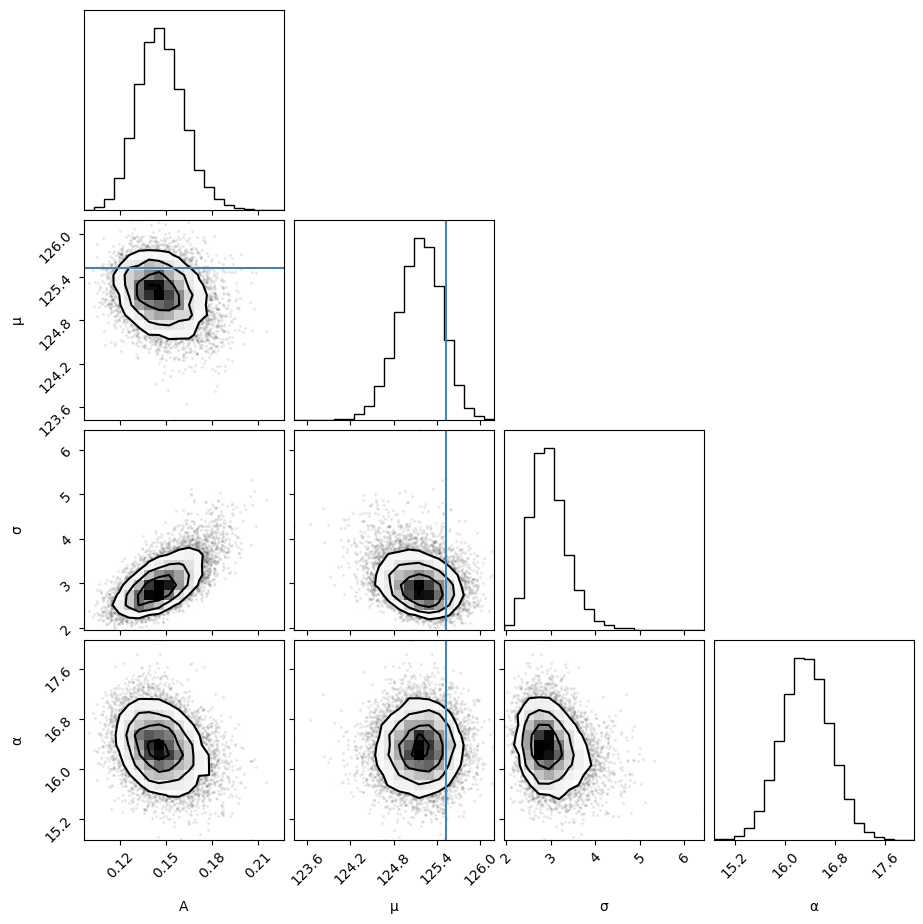

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy import optimize
!pip install emcee
!pip install corner
import emcee
import corner

# Paso 1: Montar Google Drive
drive.mount('/content/drive')

# Paso 2: Leer los datos desde el archivo en Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/higgs_data.txt'
data = np.loadtxt(file_path)

# Paso 3: Filtrar los datos entre 100 y 160 GeV
m_filtered = data[(data >= 100) & (data <= 160)]

# Calcular el histograma
HSignalBkg, edges = np.histogram(m_filtered, bins=30, range=(100, 160), density=True)
bin_centers = (edges[:-1] + edges[1:]) / 2
yerr = np.sqrt(HSignalBkg / len(m_filtered))  # Barra de error ajustada

# (c) Definir el modelo para la hipótesis alternativa
def modelo_alternativa(A, mu, sigma, alpha, x):
    fondo = (1 / alpha) * np.exp(-(x - 100) / alpha)
    señal = A * (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return señal + (1 - A) * fondo

def log_verosimilitud_alternativa(params, x):
    A, mu, sigma, alpha = params
    return -np.sum(np.log(modelo_alternativa(A, mu, sigma, alpha, x)))

# (d) Ajuste inicial con optimize.minimize
bounds = [(0, 1), (100, 160), (1, 50), (1, 50)]
resultado_alternativa = optimize.minimize(lambda params: log_verosimilitud_alternativa(params, m_filtered),
                                          x0=[0.5, 125, 10, 10], bounds=bounds)
params_best = resultado_alternativa.x
A_best, mu_best, sigma_best, alpha_best_alt = params_best

# (e) Algoritmo MCMC para estimar parámetros
def log_prior(params):
    A, mu, sigma, alpha = params
    if 0 < A < 1 and 100 < mu < 160 and 1 < sigma < 50 and 1 < alpha < 50:
        return 0
    return -np.inf

def log_posterior(params, x):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp - log_verosimilitud_alternativa(params, x)

ndim, nwalkers, nsteps = 4, 50, 5000
initial_positions = [params_best + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[m_filtered])
sampler.run_mcmc(initial_positions, nsteps, progress=True)

# Obtener resultados del muestreo
samples = sampler.get_chain(discard=1000, thin=20, flat=True)

# Corner plot con ajustes corregidos
fig = corner.corner(samples, labels=["A", "μ", "σ", "α"], truths=params_best)

# Calcular incertidumbres
param_means = np.mean(samples, axis=0)
param_stds = np.std(samples, axis=0)

for i, label in enumerate(["A", "μ", "σ", "α"]):
    print(f"{label}: {param_means[i]:.2f} ± {param_stds[i]:.2f}")

# Verificar la alineación con el ajuste
print(f"Valores iniciales optimizados: {params_best}")
print(f"Medias de MCMC: {param_means}")



Promedio de pasos: 107.849


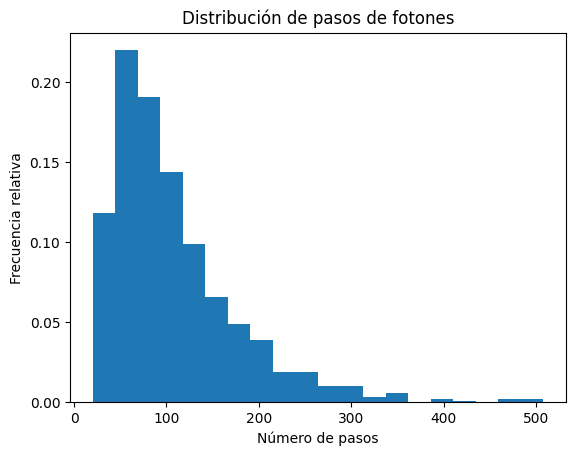

Valor esperado de pasos: 107.6936
Valor teórico de pasos: 100.0
Tiempo medio de escape (años): 8626201.682707882


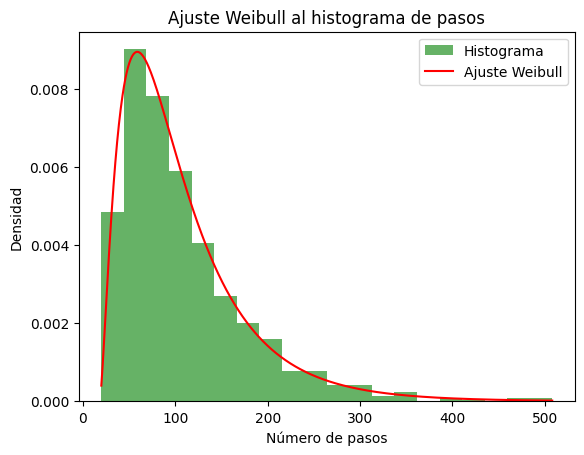

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib

def caminar_foton(N, l, Rs):
    pasos_totales = []

    for _ in range(N):
        x, y, z = 0, 0, 0
        pasos = 0

        while x**2 + y**2 + z**2 <= Rs**2:
            theta = np.random.uniform(0, np.pi)
            phi = np.random.uniform(0, 2 * np.pi)

            x += l * np.sin(theta) * np.cos(phi)
            y += l * np.sin(theta) * np.sin(phi)
            z += l * np.cos(theta)

            pasos += 1

        pasos_totales.append(pasos)

    return np.array(pasos_totales)


N = 1000
l = 0.1
Rs = 1  # Radio del Sol

pasos_foton = caminar_foton(N, l, Rs)
print("Promedio de pasos:", np.mean(pasos_foton))

n_clases = 20

min_pasos = np.min(pasos_foton)
max_pasos = np.max(pasos_foton)

bins = np.linspace(min_pasos, max_pasos, n_clases+1)

frecuencias, _ = np.histogram(pasos_foton, bins=bins)

frecuencias_normalizadas = frecuencias / sum(frecuencias)

plt.bar(bins[:-1], frecuencias_normalizadas, width=np.diff(bins), align='edge')
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia relativa")
plt.title("Distribución de pasos de fotones")
plt.show()


marcas_clase = (bins[:-1] + bins[1:]) / 2

E_n = np.sum(frecuencias_normalizadas * marcas_clase)
print("Valor esperado de pasos:", E_n)

E_teorico = (Rs / l) ** 2
print("Valor teórico de pasos:", E_teorico)


c = 3e5  # Velocidad de la luz en km/s
Rs_km = 700000  # Radio del Sol en km
l_cm = 0.6  # Camino libre medio en cm

Rs_m = Rs_km * 1e3  # Radio del sol en metros
l_m = l_cm * 1e-2  # Camino libre medio en metros

# Calcular el tiempo de escape en segundos
T_escapar = (Rs_m ** 2) / (l_m * c)
T_escapar_anos = T_escapar / (60 * 60 * 24 * 365.25)
print("Tiempo medio de escape (años):", T_escapar_anos)

parametros_weibull = exponweib.fit(pasos_foton)

x_weibull = np.linspace(min_pasos, max_pasos, 1000)
y_weibull = exponweib.pdf(x_weibull, *parametros_weibull)

plt.hist(pasos_foton, bins=bins, density=True, alpha=0.6, color='g', label='Histograma')
plt.plot(x_weibull, y_weibull, 'r-', label='Ajuste Weibull')
plt.xlabel("Número de pasos")
plt.ylabel("Densidad")
plt.title("Ajuste Weibull al histograma de pasos")
plt.legend()
plt.show()